**Disclaimer:**
*Please note that the information provided in this project is for educational and informational purposes only. I am not a financial expert, and the content presented here should not be considered as financial advice. Stock trading involves risks, and past performance is not indicative of future results. It is important to conduct thorough research and consult with a qualified financial professional before making any investment decisions.*

*Always remember to do your own due diligence and consider your personal financial circumstances and risk tolerance before making any investment decisions.*


The purpose of this analysis is to explore a classical trading technique known as Mean Reversion, or as it is known in statistics, Regression towards the mean (RTM).

RTM asserts that when values appear that are significantly higher or lower than a known average, subsequent values will return to the average, or in other words, regress towards the mean.

This strategy has been a popular method to trade stocks (read about here https://www.investopedia.com/terms/m/meanreversion.asp#:~:text=Mean%20reversion%20trading%20in%20equities,to%20save%20on%20abnormal%20lows., and here https://www.cmcmarkets.com/en/trading-guides/mean-reversion) and I thought it would be interesting to test it empirically in this analysis.

The beauty of this strategy is that it only requires descriptive statistics and a bit of probability theory to analyse it.

We'll be using the Australian Stock Exchange, specifically the ASX200 to test this strategy.



We will begin by importing all the necessary tools, and start simple with one stock on a one year timeframe.

The 20 day Moving Average (MA20) is the default technical indicator and so we'll start there.

In [ ]:
# Import the necessary libraries

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Stock data
Asset = 'CBA.AX'

ticker = yf.Ticker(Asset)

df = ticker.history(period='1y')

In [ ]:
# Create all moving averages and parameters

# Create 10, 20, 50, 100, and 200 day Moving Averages

df['MA10'] = df['Close'].rolling(10).mean()
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA100'] = df['Close'].rolling(100).mean()
df['MA200'] = df['Close'].rolling(200).mean()

# Create Upper and Lower bands

df['SD10'] = df['MA10'].rolling(10).std()
df['SD20'] = df['MA20'].rolling(20).std()
df['SD50'] = df['MA50'].rolling(50).std()
df['SD100'] = df['MA100'].rolling(100).std()
df['SD200'] = df['MA200'].rolling(200).std()

df['LowerBand10'] = df['MA10'] - df['SD10']
df['UpperBand10'] = df['MA10'] + df['SD10']

df['LowerBand20'] = df['MA20'] - df['SD20']
df['UpperBand20'] = df['MA20'] + df['SD20']

df['LowerBand50'] = df['MA50'] - df['SD50']
df['UpperBand50'] = df['MA50'] + df['SD50']

df['LowerBand100'] = df['MA100'] - df['SD100']
df['UpperBand100'] = df['MA100'] + df['SD100']

df['LowerBand200'] = df['MA200'] - df['SD200']
df['UpperBand200'] = df['MA200'] + df['SD200']


# Check the Moving Average and Bands are proper
df.head(200)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA10,MA20,MA50,...,LowerBand10,UpperBand10,LowerBand20,UpperBand20,LowerBand50,UpperBand50,LowerBand100,UpperBand100,LowerBand200,UpperBand200
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-07 00:00:00+10:00,92.769338,93.009052,91.752953,91.752953,2178339,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-08 00:00:00+10:00,91.676239,92.031018,91.398170,91.944717,2346149,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-09 00:00:00+10:00,91.800893,92.165263,91.666653,91.858429,1579114,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-13 00:00:00+10:00,92.031022,92.625508,91.954311,92.548798,1973419,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14 00:00:00+10:00,93.009051,93.536425,92.625507,93.363831,2971378,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13 00:00:00+11:00,118.010002,118.220001,116.820000,117.550003,1749751,0.0,0.0,118.126000,116.507015,113.891410,...,117.080185,119.171816,115.414861,117.599170,110.430828,117.351993,NaN,NaN,NaN,NaN
2024-03-14 00:00:00+11:00,117.540001,117.559998,115.339996,116.220001,1972503,0.0,0.0,118.107000,116.714951,114.014438,...,117.140767,119.073233,115.568524,117.861377,110.597750,117.431126,NaN,NaN,NaN,NaN
2024-03-15 00:00:00+11:00,115.000000,115.540001,114.000000,115.540001,5370902,0.0,0.0,117.925000,116.784835,114.136431,...,117.082651,118.767349,115.597191,117.972478,110.766273,117.506588,NaN,NaN,NaN,NaN


For this analysis, we'll be using one standard deviation as an indicator to buy in anticipation of a return to the moving average.

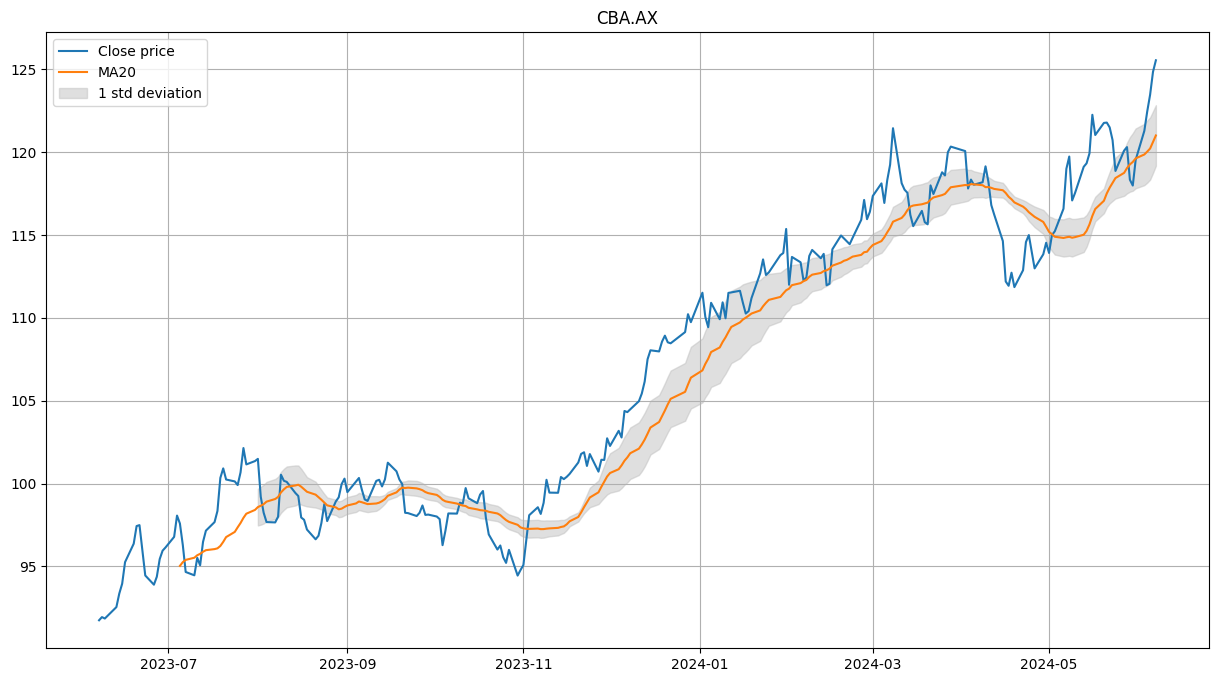

In [ ]:
# Plot things

plt.figure(figsize=(15,8))
plt.title(Asset)
plt.plot(df['Close'], label='Close price')
plt.plot(df['MA20'], label='MA20')
# Plot the fill_between for one standard deviation
plt.fill_between(df.index, df['LowerBand20'], df['UpperBand20'], color='silver', alpha=0.5, label='1 std deviation')
plt.grid()
plt.legend()


Now we code an algorithm that will iterate through the stock dataframe and check for instances where the price closes at or below one standard deviation from the moving average.

We will also say that the price closing at or above the moving average is a good time to sell.


In [ ]:
Buy = []

Sell = []

Stopouts = []

Stopouts_adjusted = []

def BuySell(n):

    # Buy Algorithm
    for i in range(len(df)):
        if df.Close.iloc[i] <= df[f'LowerBand{n}'].iloc[i]:
            Buy.append(i)
    # Sell Algorithm
        if df.Close.iloc[i] >= df[f'MA{n}'].iloc[i]:
            Sell.append(i)


We now need a measure of success for this strategy. Simply calculating the return between the purchase and sale is not sufficient as there is likely to be a lot of variability in the instances of buying and selling.

It would also assume that a trader always waits until the sell point to sell, which is not realistic.

A more realistic approach is the use of stop-outs.

An investor/trader worth their salt typically uses a stop-out, which is a point they are willing to tolerate the price deviating in the wrong direction from their purchase price.

If the stop-out is triggered before a sell signal, that is considered a loss.

We will be using the stop-out as a measure of success in the strategy. The idea is to take all the buy signals, subtract the ones that lead to a stop-out, and compare the ones left over to all buy signals to determine the probability of success (This is somewhat idealised as it assumes the trader always sells at the average, however, we're not using returns as a measure).

For this analysis, I will be using a stop-out of -4% and a trading period of 20 days (We will discuss the limits of this preset threshold and period later).

In [ ]:
def StopoutFactor():

    # Tolerance for loss in %
    Threshold = 4

    # Trading period in number of days
    Trading_Period = 20

    for buy in Buy:
        start = buy
        end = buy + Trading_Period
        close_prices = df.Close.iloc[start:end]
        stop = df.Close.iloc[buy] * (100 - Threshold)/100
        if any(close_prices < stop):
            Stopouts.append(buy)

    # Adjust stopouts to account for selling before stopping

    for i in range(len(Stopouts)):
        stopout = Stopouts[i]
        sell_occurred = False

        for j in range(len(Sell)):
            sell_signal = Sell[j]

            if stopout < sell_signal and (i+1 < len(Stopouts) and sell_signal < Stopouts[i+1]):
                sell_occurred = True
                break

        if not sell_occurred:
            Stopouts_adjusted.append(stopout)

In the stopout algorithm, there are two main components:

1. It checks for any instances within 20 days following the buy signal where the closing price drops 4% or more.
2. It modifies the stopout instances to account for sell signals.

This was designed to address situations where a sell signal occurs after a buy signal but before a stopout. In these cases, it wouldn't be considered a loss as the trader would have ideally sold at a profit.

After running the algorithm, we plot the results to eyeball how the strategy is doing

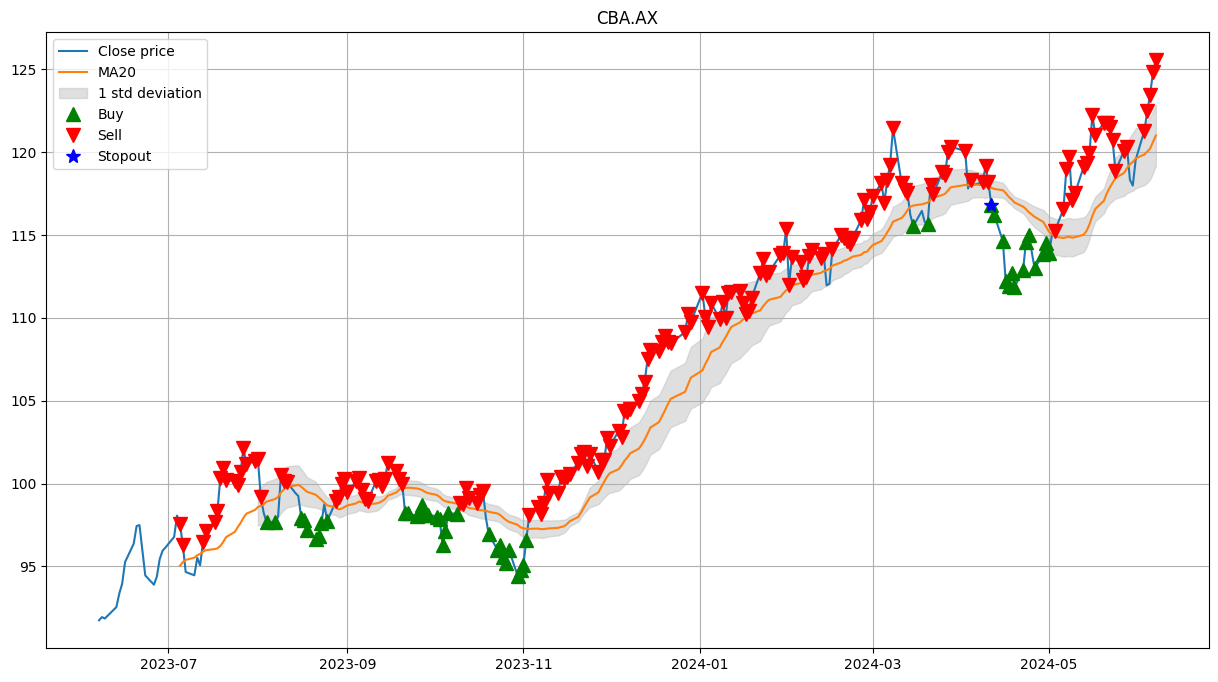

In [ ]:
BuySell(20)
StopoutFactor()

# Plot things
plt.figure(figsize=(15, 8))
plt.title(Asset)
plt.plot(df['Close'], label='Close price')
plt.plot(df['MA20'], label='MA20')

# Plot the fill_between for one standard deviation
plt.fill_between(df.index, df['LowerBand20'], df['UpperBand20'], color='silver', alpha=0.5, label='1 std deviation')
plt.grid()

# Adding buy markers with label
for i, x in enumerate(Buy):
    if i == 0:
        plt.plot_date(df.index[x], df.Close.iloc[x], '^', markersize=10, color='g', label='Buy')
    else:
        plt.plot_date(df.index[x], df.Close.iloc[x], '^', markersize=10, color='g')

# Adding sell markers with label
for i, x in enumerate(Sell):
    if i == 0:
        plt.plot_date(df.index[x], df.Close.iloc[x], 'v', markersize=10, color='r', label='Sell')
    else:
        plt.plot_date(df.index[x], df.Close.iloc[x], 'v', markersize=10, color='r')

# Adding stopout markers with label
for i, s in enumerate(Stopouts_adjusted):
    if i == 0:
        plt.plot_date(df.index[s], df.Close.iloc[s], '*', markersize=10, color='b', label='Stopout')
    else:
        plt.plot_date(df.index[s], df.Close.iloc[s], '*', markersize=10, color='b')


# Add the legend
plt.legend()
plt.show()

The strategy appears to do  fairly well on a one year timeframe. Let's calculate the probability of success to be sure

In [ ]:
Buy = []

Sell = []

Stopouts = []

Stopouts_adjusted = []

BuySell(20)
StopoutFactor()

# Probability of success

Total_Buy = len(Buy)

Total_Stopouts = len(Stopouts)

Successful_Buy = Total_Buy - Total_Stopouts

probability = Successful_Buy / Total_Buy * 100

print(f"Probability of Success: {probability:.2f}%")


Probability of Success: 97.92%


This is an impressive success rate and well within the realm of statistical edge. Let's check the other popular moving averages like MA10, MA50, MA100 and MA200.

MA10

In [ ]:
Buy = []

Sell = []

Stopouts = []

Stopouts_adjusted = []

BuySell(10)
StopoutFactor()

# Probability of success

Total_Buy = len(Buy)

Total_Stopouts = len(Stopouts)

Successful_Buy = Total_Buy - Total_Stopouts

probability = Successful_Buy / Total_Buy * 100

print(f"Probability of Success: {probability:.2f}%")


Probability of Success: 96.43%


MA50

In [ ]:
Buy = []

Sell = []

Stopouts = []

Stopouts_adjusted = []

BuySell(50)
StopoutFactor()

# Probability of success

Total_Buy = len(Buy)

Total_Stopouts = len(Stopouts)

Successful_Buy = Total_Buy - Total_Stopouts

probability = Successful_Buy / Total_Buy * 100

print(f"Probability of Success: {probability:.2f}%")


Probability of Success: 100.00%


MA100

In [ ]:
Buy = []

Sell = []

Stopouts = []

Stopouts_adjusted = []

df = ticker.history(period='2y') # 2 years to allow time for MA100

# Re-create 100 day Moving Average for new timeframe

df['MA100'] = df['Close'].rolling(100).mean()

# Create Upper and Lower bands

df['SD100'] = df['MA100'].rolling(100).std()

df['LowerBand100'] = df['MA100'] - df['SD100']

df['UpperBand100'] = df['MA100'] + df['SD100']

BuySell(100)
StopoutFactor()

# Probability of success

Total_Buy = len(Buy)

Total_Stopouts = len(Stopouts)

Successful_Buy = Total_Buy - Total_Stopouts

probability = Successful_Buy / Total_Buy * 100

print(f"Probability of Success: {probability:.2f}%")


Probability of Success: 98.36%


And MA200

In [ ]:
Buy = []

Sell = []

Stopouts = []

Stopouts_adjusted = []

df = ticker.history(period='5y') # 5 years to allow time for MA200

# Re-create 200 day Moving Average for new timeframe

df['MA200'] = df['Close'].rolling(200).mean()

# Create Upper and Lower bands

df['SD200'] = df['MA200'].rolling(200).std()

df['LowerBand200'] = df['MA200'] - df['SD200']

df['UpperBand200'] = df['MA200'] + df['SD200']

BuySell(200)
StopoutFactor()

# Probability of success

Total_Buy = len(Buy)

Total_Stopouts = len(Stopouts)

Successful_Buy = Total_Buy - Total_Stopouts

probability = Successful_Buy / Total_Buy * 100

print(f"Probability of Success: {probability:.2f}%")


Probability of Success: 90.70%


In this preliminary analysis, the strategy peforms well on this one stock and one year timeframe and there seems to be no noteable difference in the probability of success for each moving average.

However, this is just the beginning of the analysis, the next stages will get progressively more sophisticated.

We will be testing each Moving Average indicator (10, 20, 50, 100, 200) on a 60 month or 5 years of historical data.

5 years was chosen to cover one economic cycle (see here https://www.investopedia.com/terms/e/economic-cycle.asp#:~:text=An%20economic%20cycle%20is%20the,stage%20of%20the%20economic%20cycle.)

While there is an argument to be made for 10 year or even 20 year timeframes because they provide more data and cover more economic cycles, 5 years is closer to recent times and more likley to be indicative of future trends.

Visualisation of all moving averages

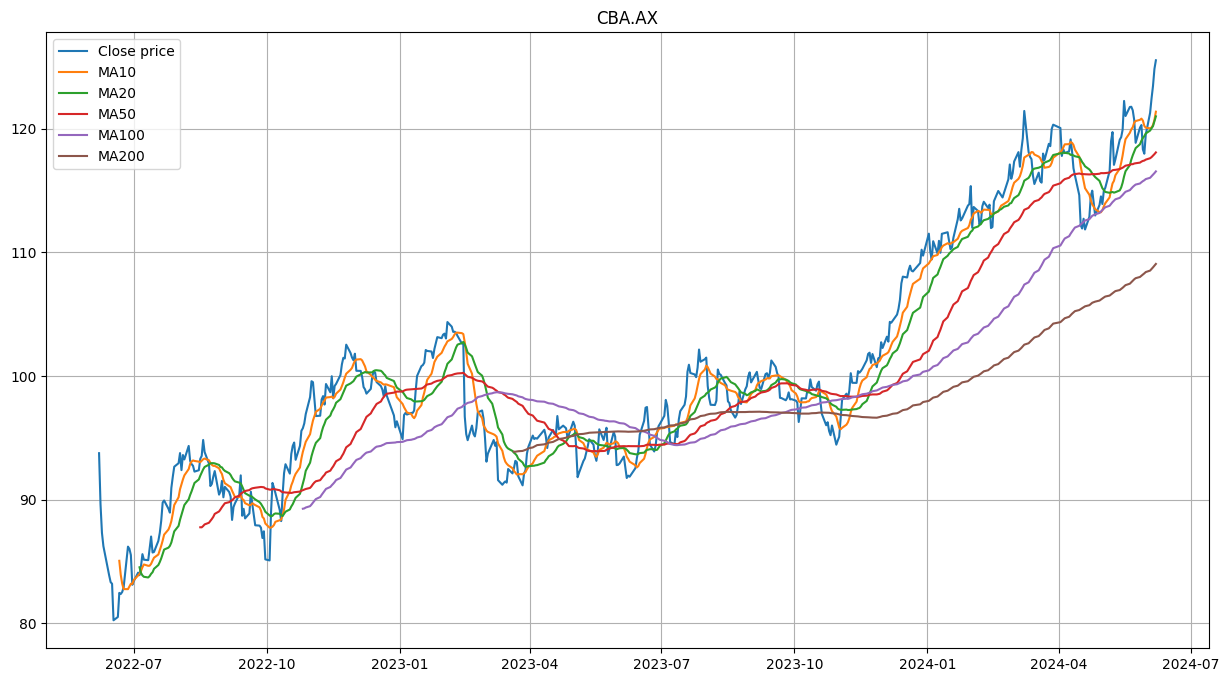

In [ ]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA100'] = df['Close'].rolling(100).mean()
df['MA200'] = df['Close'].rolling(200).mean()

# Plot things
plt.figure(figsize=(15,8))
plt.title(Asset)
plt.plot(df['Close'], label='Close price')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA100'], label='MA100')
plt.plot(df['MA200'], label='MA200')
plt.grid()
plt.legend()

Not only are we testing all 5 indiciators on 5 years worth of data, but we'll be randomly sampling 100 stocks from the ASX200 and testing all of them to see the probability of success in the stock population on each moving average indicator.

Sample generator

In [ ]:
import random

Buys = []

Sells = []

Stopouts = []

Stopouts_adjusted = []

probability10 = []

probability20 = []

probability50 = []

probability100 = []

probability200 = []

ASX_200 = [
    "A2M.AX", "AAA.AX", "ABC.AX", "ABP.AX", "AFI.AX", "AGL.AX", "AIA.AX", "ALD.AX",
    "ALL.AX", "ALQ.AX", "ALU.AX", "ALX.AX", "AMC.AX", "AMP.AX", "ANN.AX", "ANZ.AX",
    "APA.AX", "APE.AX", "APT.AX", "APX.AX", "ARB.AX", "ARG.AX", "AST.AX", "ASX.AX",
    "AWC.AX", "AZJ.AX", "BAP.AX", "BEN.AX", "BGA.AX", "BHP.AX", "BIN.AX", "BKW.AX",
    "BLD.AX", "BOQ.AX", "BPT.AX", "BRG.AX", "BSL.AX", "BWP.AX", "BXB.AX", "CAR.AX",
    "CBA.AX", "CCL.AX", "CCP.AX", "CDA.AX", "CGF.AX", "CHC.AX", "CHN.AX", "CIA.AX",
    "CIM.AX", "CLW.AX", "CMW.AX", "CNU.AX", "COH.AX", "COL.AX", "CPU.AX", "CQR.AX",
    "CSL.AX", "CSR.AX", "CTD.AX", "CWN.AX", "CWY.AX", "DEG.AX", "DHG.AX", "DMP.AX",
    "DOW.AX", "DRR.AX", "DXS.AX", "EBO.AX", "ELD.AX", "EML.AX", "EVN.AX", "EVT.AX",
    "FBU.AX", "FLT.AX", "FMG.AX", "FPH.AX", "GMG.AX", "GNE.AX", "GOZ.AX", "GPT.AX",
    "GXY.AX", "HLS.AX", "HVN.AX", "IAG.AX", "IEL.AX", "IFL.AX", "IFT.AX", "IGO.AX",
    "ILU.AX", "IOO.AX", "IOZ.AX", "IPL.AX", "IRE.AX", "IVV.AX", "JBH.AX", "JHX.AX",
    "LFG.AX", "LFS.AX", "LLC.AX", "LNK.AX", "LYC.AX", "MCY.AX", "MEZ.AX", "MFG.AX",
    "MGF.AX", "MGOC.AX", "MGR.AX", "MIN.AX", "MLT.AX", "MP1.AX", "MPL.AX", "MQG.AX",
    "MTS.AX", "NAB.AX", "NCM.AX", "NEC.AX", "NHF.AX", "NIC.AX", "NSR.AX", "NST.AX",
    "NUF.AX", "NWL.AX", "NXT.AX", "ORA.AX", "ORE.AX", "ORG.AX", "ORI.AX", "OSH.AX",
    "OZL.AX", "PBH.AX", "PDL.AX", "PLS.AX", "PME.AX", "PMGOLD.AX", "PMV.AX", "PNI.AX",
    "PNV.AX", "PPT.AX", "PTM.AX", "QAN.AX", "QBE.AX", "QUB.AX", "REA.AX", "REH.AX",
    "RHC.AX", "RIO.AX", "RMD.AX", "RRL.AX", "RWC.AX", "S32.AX", "SCG.AX", "SCP.AX",
    "SDF.AX", "SEK.AX", "SGM.AX", "SGP.AX", "SGR.AX", "SHL.AX", "SKC.AX", "SKI.AX",
    "SLK.AX", "SNZ.AX", "SOL.AX", "SPK.AX", "STO.AX", "STW.AX", "SUL.AX", "SUN.AX",
    "SVW.AX", "SYD.AX", "TAH.AX", "TCL.AX", "TLS.AX", "TLT.AX", "TNE.AX", "TPG.AX",
    "TWE.AX", "TYR.AX", "VAP.AX", "VAS.AX", "VCX.AX", "VEA.AX", "VEU.AX", "VGS.AX",
    "VOC.AX", "VTS.AX", "VUK.AX", "WAM.AX", "WBC.AX", "WEB.AX", "WES.AX", "WOR.AX",
    "WOW.AX", "WPL.AX", "WPR.AX", "WTC.AX", "XRO.AX", "YAL.AX", "Z1P.AX", "ZIM.AX"
]


Sample = random.choices(ASX_200, k=100)

Probability calculator

In [ ]:
import logging

# Skip yfinance warnings if stock is missing
logging.getLogger("yfinance").setLevel(logging.CRITICAL)

# Trader preference

Threshold = 4 # in percentage
Trading_Period = 20 # in number of days

def probability_success(ma_period, Sample):
    Buys = []
    Sells = []
    Stopouts = []
    Stopouts_adjusted = []

    # Select the appropriate probability list based on the ma_period
    if ma_period == 10:
        probability_list = probability10
    elif ma_period == 20:
        probability_list = probability20
    elif ma_period == 50:
        probability_list = probability50
    elif ma_period == 100:
        probability_list = probability100
    elif ma_period == 200:
        probability_list = probability200
    else:
        raise ValueError("Invalid moving average period. Choose from 10, 20, 50, 100, 200.")

    for stock in Sample:
        Asset = stock
        ticker = yf.Ticker(Asset)

        try:
            df = ticker.history(period='5y')
        except Exception as e:
            continue

        if df.empty:
            continue

        ma_column = f'MA{ma_period}'
        sd_column = f'SD{ma_period}'

        df[ma_column] = df['Close'].rolling(ma_period).mean()
        df[sd_column] = df[ma_column].rolling(ma_period).std()
        df['LowerBand'] = df[ma_column] - df[sd_column]

        for i in range(len(df)):
            if df.Close.iloc[i] <= df['LowerBand'].iloc[i]:
                Buys.append(i)
            if df.Close.iloc[i] >= df[ma_column].iloc[i]:
                Sells.append(i)

        for buy in Buys:
            start = buy
            end = buy + Trading_Period
            close_prices = df.Close.iloc[start:end]
            stop = df.Close.iloc[buy] * (100 - Threshold) / 100
            if any(close_prices < stop):
                Stopouts.append(buy)

        for i in range(len(Stopouts)):
            stopout = Stopouts[i]
            sell_occurred = False

            for j in range(len(Sells)):
                sell_signal = Sells[j]

                if stopout < sell_signal and (i + 1 < len(Stopouts) and sell_signal < Stopouts[i + 1]):
                    sell_occurred = True
                    break

            if not sell_occurred:
                Stopouts_adjusted.append(stopout)

        Total_Buy = len(Buys)
        Total_Stopouts = len(Stopouts)
        Successful_Buy = Total_Buy - Total_Stopouts

        try:
            probability = Successful_Buy / Total_Buy * 100
            probability_list.append(probability)
        except ZeroDivisionError:
            continue

        Buys.clear()
        Sells.clear()
        Stopouts.clear()
        Stopouts_adjusted.clear()

    print(f"Probabilities calculated for MA{ma_period}")

probability_success(10, Sample)
probability_success(20, Sample)
probability_success(50, Sample)
probability_success(100, Sample)
probability_success(200, Sample)



Probabilities calculated for MA10
Probabilities calculated for MA20
Probabilities calculated for MA50
Probabilities calculated for MA100
Probabilities calculated for MA200


The probabilities are calculated, let's see the results

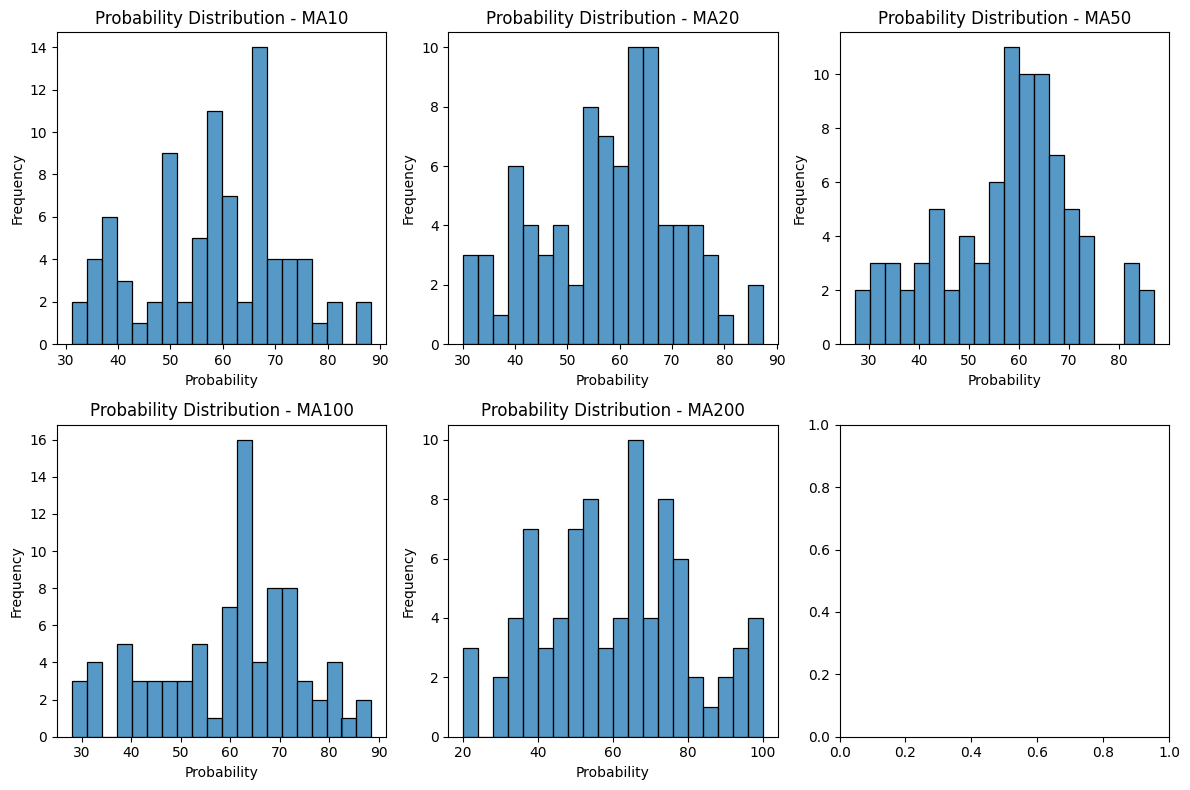

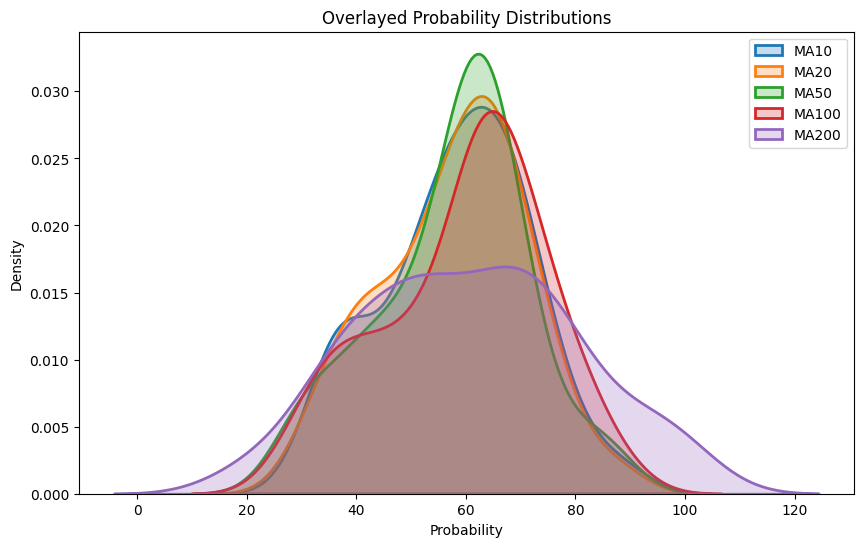

MA10

Mean: 58.29
Standard Deviation: 13.22
Variance: 174.78

MA20

Mean: 57.88
Standard Deviation: 13.09
Variance: 171.39

MA50

Mean: 57.60
Standard Deviation: 13.59
Variance: 184.74

MA100

Mean: 59.58
Standard Deviation: 14.61
Variance: 213.32

MA200

Mean: 60.62
Standard Deviation: 19.62
Variance: 385.12



In [ ]:
# List of moving averages
moving_averages = ['MA10', 'MA20', 'MA50', 'MA100', 'MA200']

# List of probability lists
probability_lists = [probability10, probability20, probability50, probability100, probability200]

# Create subplots for all histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Loop through each moving average and its corresponding probability list
for i, (ma, probabilities) in enumerate(zip(moving_averages, probability_lists)):
    row = i // 3
    col = i % 3

    # Plot histogram on the corresponding subplot
    sns.histplot(probabilities, bins=20, ax=axes[row, col])  # Adjust the number of bins as needed
    axes[row, col].set_title(f'Probability Distribution - {ma}')
    axes[row, col].set_xlabel('Probability')
    axes[row, col].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show all histograms
plt.show()

# Create a combined smoothed distribution plot for all distributions
plt.figure(figsize=(10, 6))

# Plot each probability list on the same graph
for probabilities, ma in zip(probability_lists, moving_averages):
    sns.kdeplot(probabilities, label=ma, linewidth=2, fill = True)  # Adjust linewidth as needed

# Add title and labels
plt.title('Overlayed Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()

# Show the overlayed plot
plt.show()

# Calculate and print statistics for each moving average
for ma, probabilities in zip(moving_averages, probability_lists):
    mean = np.mean(probabilities)
    std = np.std(probabilities)
    var = np.var(probabilities)

    print(f'{ma}\n')
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Variance: {var:.2f}\n")

Over five years of historical data from 100 representative stocks, the Mean Reversion strategy's success rate averages between 50 and 60%. However, the considerable variance and standard deviation suggest significant uncertainty in this generalisation.

The distributions reveal numerous instances where stocks demonstrate a high success probability with mean reversion, reaching up to 90%. Equally notable are the stocks where using mean reversion is no more effective than random selection.

This data suggests there's an interaction between the Mean Reversion strategy and the specific stock it's applied to. For some stocks, a trader may excel using Mean Reversion, while for others, the opposite is true. Therefore, it's clear that Mean Reversion isn't universally applicable due to the evident heterogeneity among stocks. A more effective approach might involve analyzing the strategy's success probability for individual stocks.

There are notable limitations to this analysis. Mainly, using a preset threshold and trading period reduces the results' general applicability because each trader has unique loss tolerances and holding periods. These factors can even vary for the same trader depending on the day. While these results may not apply broadly, I encourage others to attempt replicating them, using this markdown and considering their own tolerances and trading periods. It's also worth noting that the stop-outs analysis method isn't flawless, as it presumes that a trader always capitalises on a sell signal before a stop-out.

Despite these limitations, empirically testing this longstanding trading strategy has been interesting, and the method used to test the probability of success can be applied to other trading strategies in the future.